In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_iris=datasets.load_iris()
data_df=pd.DataFrame(data_iris['data'],columns=data_iris['feature_names'])
target_df=pd.DataFrame(data_iris['target'],columns=['speices'])
data_tot=pd.concat([data_df,target_df],axis=1)
data_tot.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speices
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   speices            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# plot histogram for data

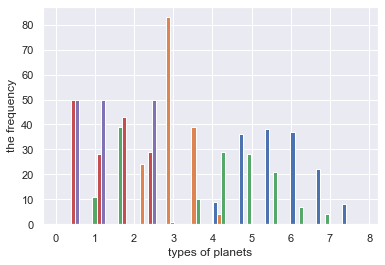

In [4]:
sns.set()
plt.hist(data_tot,bins=int(np.sqrt(len(data_tot)))) ##common use to put no of bins with sqrt of no of data points
plt.xlabel('types of planets')
plt.ylabel('the frequency')
plt.show()

Drawbacks of histogram: 

1-hard to identify no of bins

2-same data with different no of bins looks different

3-cannot see original data points instead we see ranges

# Swarm plot

<AxesSubplot:xlabel='speices', ylabel='petal length (cm)'>

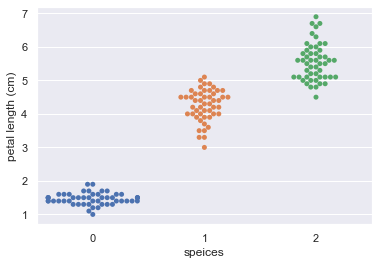

In [5]:
sns.swarmplot(x='speices',y='petal length (cm)',data=data_tot)

Drawbacks of swarmplot:

if data is so big points ovrlap each other which make visualization bad 

# ECDF

In [6]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
    

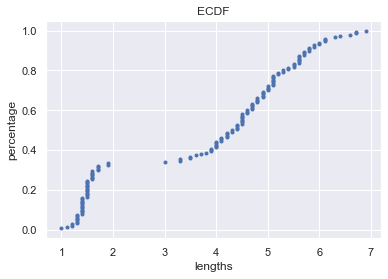

In [7]:
x,y=ecdf(data_tot['petal length (cm)'])
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('lengths')
plt.ylabel('percentage')
plt.title('ECDF')
plt.show()


In [8]:
seosta_data=data_tot[data_tot['speices']==0]['petal length (cm)']
versi_data=data_tot[data_tot['speices']==1]['petal length (cm)']
virgina_data=data_tot[data_tot['speices']==2]['petal length (cm)']

In [9]:
x_s,y_s=ecdf(seosta_data)
x_v,y_v=ecdf(versi_data)
x_vi,y_vi=ecdf(virgina_data)

<function matplotlib.pyplot.show(close=None, block=None)>

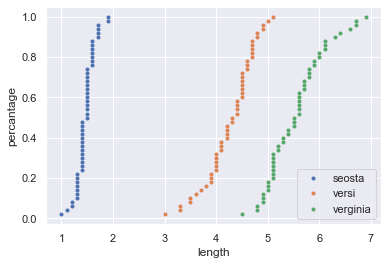

In [10]:
plt.plot(x_s,y_s,'.',linestyle='none')
plt.plot(x_v,y_v,'.',linestyle='none')
plt.plot(x_vi,y_vi,'.',linestyle='none')
plt.legend(['seosta','versi','verginia'])
plt.xlabel('length')
plt.ylabel('percantage')
plt.show

# Mean vs Median

mean                             vs                                                                          median

1-easy to calculate                vs                                       1-computitonly expensive in case of alot of numbers

2-biased with oultiers              vs                                        2- robust to outliers

In [11]:
data_tot.groupby(by=['speices'])['petal length (cm)'].mean()

speices
0    1.462
1    4.260
2    5.552
Name: petal length (cm), dtype: float64

In [12]:
data_tot.groupby(by=['speices'])['petal length (cm)'].median()

speices
0    1.50
1    4.35
2    5.55
Name: petal length (cm), dtype: float64

# Percentiles

the precentage of having observations that less or equal specific data point


25% .............................Q1


50%..............................Q2(median)


75%..............................Q3


In [13]:
p=np.array([2.5,25,50,75],dtype=np.float64)
percents=np.percentile(data_tot['petal length (cm)'],p)
print('value corresponding 2.5 % of data is ', percents[0])
print('value corresponding 25 % of data is ', percents[1])
print('value corresponding 50 % of data is ', percents[2])
print('value corresponding 75 % of data is ', percents[3])

value corresponding 2.5 % of data is  1.2725
value corresponding 25 % of data is  1.6
value corresponding 50 % of data is  4.35
value corresponding 75 % of data is  5.1


# Marking percentiles on ECDF

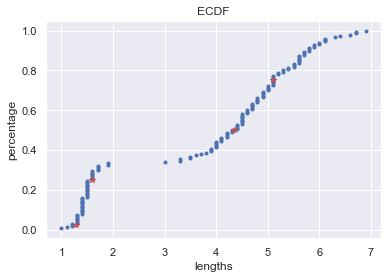

In [14]:
x,y=ecdf(data_tot['petal length (cm)'])
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(percents,p/100,'r*')
plt.xlabel('lengths')
plt.ylabel('percentage')
plt.title('ECDF')
plt.show()

# Box_plot

<AxesSubplot:xlabel='speices', ylabel='petal length (cm)'>

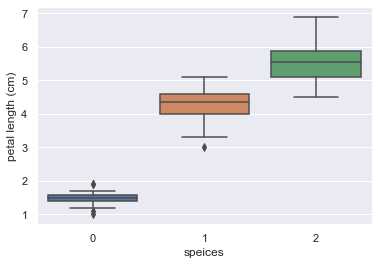

In [15]:
sns.boxplot(x='speices',y='petal length (cm)',data=data_tot)

all previous plots allow us to compare different species with same feature each other but what if we want to compare different features to
same spices

# Covariance and corr

covariance= mean((x-xbar)(y-ybar)) (give indication to direction  of relation not value)


corr =covariance/(std(x)*std(y))) (give indication to strength of relation)

In [16]:
versi_data=data_tot[data_tot['speices']==1 ]
versi_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speices
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


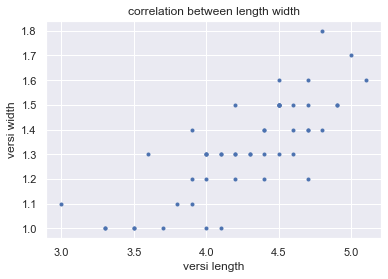

In [17]:
plt.plot(versi_data['petal length (cm)'],versi_data['petal width (cm)'],marker='.',linestyle='none')
plt.xlabel('versi length')
plt.ylabel('versi width')
plt.title('correlation between length width')
plt.show()

In [18]:
cov_matrix=np.cov(versi_data['petal length (cm)'],versi_data['petal width (cm)'])

In [19]:
cov_matrix[1,1]  ##varaince of y
cov_matrix[1,1]  ## variance of x
cov_matrix[1,0] ==cov_matrix[0,1]  ##cov between x,y

True

In [20]:
def pearson_corr(x,y):
    
    cor=np.corrcoef(x,y)
    return cor[1,0]

In [21]:
pearson_corr(versi_data['petal length (cm)'],versi_data['petal width (cm)'])

0.7866680885228169

# Statistical inference

we need probability to do inference so we can take a sample and visualzie it and do operations on then we can
conclude that the values on another simillar data will be in certain range

# Bernoulli trial

any trial which has one of two outcomes( win or lose) ,(sucess or fail) , (head or tail)......etc

In [22]:
np.random.seed(1)
rn=np.random.random(4)
head=rn<0.5
n_head=sum(head)
print("no of heads in 4 random tosses is",n_head)
    

no of heads in 4 random tosses is 3


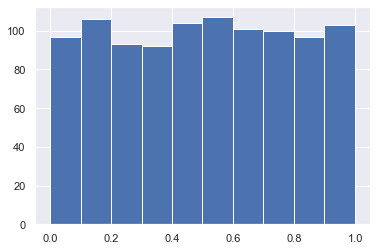

In [23]:
np.random.seed(1)
rn_arr=np.empty(1000)
for i in range(1000):
    rn_arr[i]=np.random.random()
    
plt.hist(rn_arr)
plt.show()

# Simulate bernoulli trial

In [24]:
def bernoulli(n,p): ## n ......number of simulation , p...... probabilty of sucess
    count_sucess=0
    for i in  range(n):
        rv=np.random.random()
        if rv<p:
            count_sucess+=1
    return count_sucess
            
        
    

# simulate # of defaults in 100 mortgage loan(التخلف في سد دين الي البنك)

Text(0.5, 1.0, 'will the bank lose?')

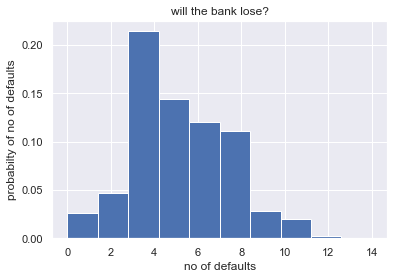

In [25]:
np.random.seed(1)
no_all_defaults=np.empty(1000)
for i in range(1000):
    no_all_defaults[i]=bernoulli(100,0.05)
    
plt.hist(no_all_defaults,density=True)
plt.xlabel('no of defaults')
plt.ylabel('probabilty of no of defaults')
plt.title('will the bank lose?')
    
    

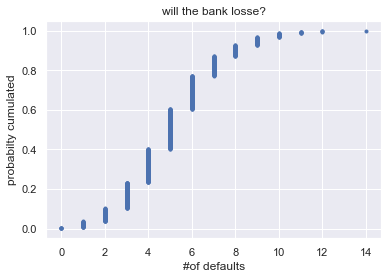

In [26]:
x,y=ecdf(no_all_defaults)
plt.plot(x,y,'.',linestyle='none')
plt.xlabel('#of defaults')
plt.ylabel('probabilty cumulated')
plt.title('will the bank losse?')
plt.show()

In [27]:
sum(no_all_defaults>=10)/len(no_all_defaults) ##from 100 client there is 2.7 % that 10 or more will not repay the loan

0.033

# Binomial distribution

Searching for k sucesses in N trials (bernoulli trials)

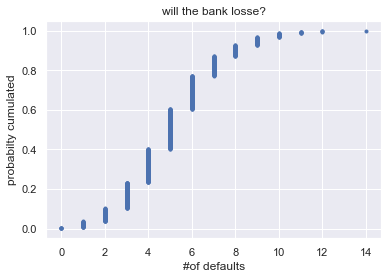

In [28]:
np.random.seed(1)
n_defaults=np.random.binomial(100,0.05,10000)
x,y=ecdf(no_all_defaults)
plt.plot(x,y,'.',linestyle='none')
plt.xlabel('#of defaults')
plt.ylabel('probabilty cumulated')
plt.title('will the bank losse?')
plt.show()

# PMF

In [29]:
max(n_defaults)

15

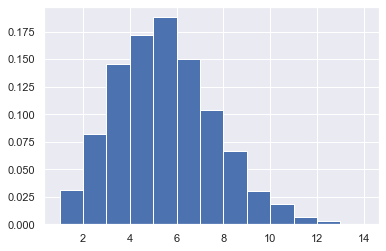

In [30]:
plt.hist(n_defaults,bins=np.arange(1,max(n_defaults)-0.5),density=True)
plt.show()

# Possion process

number of occurence for events that independent events in a period of time is possion process

possion process is a special case of binomial distribution with alot of trials with low probability (rare events)

In [31]:
sample_poisson=np.random.poisson(10,1000)
poisson_mean=np.mean(sample_poisson)
poisson_std=np.std(sample_poisson)
print('poisson mean is',poisson_mean)
print('poisson std is',poisson_std)

n =[20, 100, 1000]
p=[0.5, 0.1, 0.01]

for i in range(3):
    sample_binomial=np.random.binomial(n[i],p[i],1000)
    print("binoimal mean is",np.mean(sample_binomial))
    print("binoimal std is",np.std(sample_binomial))


poisson mean is 10.128
poisson std is 3.0291279273084517
binoimal mean is 10.084
binoimal std is 2.1524274668383137
binoimal mean is 10.09
binoimal std is 2.9417511791448305
binoimal mean is 9.992
binoimal std is 3.241903144759263


# Continous quantities

# Normal distribution

Symmertic  

unimodal

bell shape

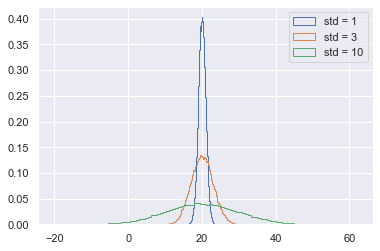

In [32]:
samples_std1=np.random.normal(20,1,100000)
samples_std3=np.random.normal(20,3,100000)
samples_std10=np.random.normal(20,10,100000)


plt.hist(samples_std1,density=True,bins=100,histtype='step')
plt.hist(samples_std3,density=True,bins=100,histtype='step')
plt.hist(samples_std10,density=True,bins=100,histtype='step')



plt.legend(('std = 1', 'std = 3', 'std = 10'))

plt.show()

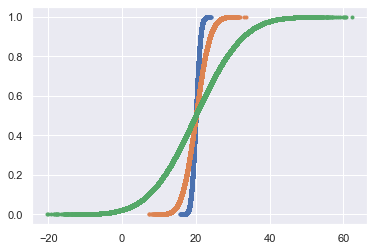

In [33]:
x1,y1=ecdf(samples_std1)
x3,y3=ecdf(samples_std3)
x10,y10=ecdf(samples_std10)

plt.plot(x1,y1,'.',linestyle='none')
plt.plot(x3,y3,'.',linestyle='none')
plt.plot(x10,y10,'.',linestyle='none')
plt.show()

In [34]:
belmont_data=pd.read_html('https://en.wikipedia.org/wiki/Belmont_Stakes',match='Time')

In [35]:
len(belmont_data)

1

In [36]:
df_belmont=pd.DataFrame(dict(*belmont_data))

In [37]:
df_belmont.head()
df_belmont.reset_index()

,index,Year,Winner,Jockey,Trainer,Owner,Track,Length,Track Condition,Time*
0,0,2021,Essential Quality,Luis Saez,Brad H. Cox,Godolphin Stables,Belmont,11⁄2-miles,Fast,2:27.11
1,1,2020,Tiz the Law,Manny Franco,Barclay Tagg,Sackatoga Stable,Belmont,11⁄8-miles,Fast,1:46.53
2,2,2019,Sir Winston,Joel Rosario,Mark E. Casse,Tracy Farmer,Belmont,11⁄2-miles,Fast,2:28.30
3,3,2018,Justify,Mike Smith,Bob Baffert,"WinStar Farm, China Horse Club, et al.",Belmont,11⁄2-miles,Fast,2:28.18
4,4,2017,Tapwrit,José Ortiz,Todd Pletcher,"Bridlewood Farm, et al.",Belmont,11⁄2-miles,Fast,2:30.02
...,...,...,...,...,...,...,...,...,...,...
150,150,1871,Harry Bassett,W. Miller,David McDaniel,David McDaniel,Jerome Park,15⁄8-miles,Fast,2:56.00
151,151,1870,Kingfisher,Edward D. Brown,Raleigh Colston Sr.,Daniel Swigert,Jerome Park,15⁄8-miles,Fast,2:59.50
152,152,1869,Fenian,C. Miller,Jacob Pincus,August Belmont,Jerome Park,15⁄8-miles,Heavy,3:04.25
153,153,1868,General Duke,Robert Swim,Andrew Thompson,McConnell & Co.,Jerome Park,15⁄8-miles,Fast,3:02.00


In [38]:
df_belmont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             155 non-null    int64 
 1   Winner           155 non-null    object
 2   Jockey           155 non-null    object
 3   Trainer          155 non-null    object
 4   Owner            155 non-null    object
 5   Track            155 non-null    object
 6   Length           155 non-null    object
 7   Track Condition  155 non-null    object
 8   Time*            153 non-null    object
dtypes: int64(1), object(8)
memory usage: 11.0+ KB


In [39]:
df_belmont.dropna(subset=['Time*'],inplace=True)
df_belmont.drop(index=[109,110],axis=0,inplace=True) ##garbage data
df_belmont['ind']=np.arange(0,len(df_belmont['Time*']))
df_belmont.set_index('ind',inplace=True,drop=True)


In [40]:
import datetime
import time
from dateutil import parser
timee=np.zeros(len(df_belmont['Time*']))
for i in range(len(df_belmont['Time*'])):

    
    x = parser.parse(df_belmont['Time*'][i])
    timee[i]=(x.hour*3600+x.minute*60+x.second)/60
timee

array([147.1       , 106.51666667, 148.3       , 148.16666667,
       150.01666667, 148.5       , 146.65      , 148.51666667,
       150.7       , 150.41666667, 150.86666667, 151.56666667,
       147.53333333, 149.65      , 148.73333333, 147.85      ,
       148.75      , 147.5       , 148.25      , 149.7       ,
       146.55      , 151.18333333, 147.86666667, 149.15      ,
       148.81666667, 148.95      , 152.01666667, 146.81666667,
       149.96666667, 146.11666667, 148.1       , 147.2       ,
       146.        , 146.4       , 148.2       , 149.8       ,
       147.        , 147.2       , 147.8       , 148.2       ,
       149.        , 149.8       , 148.6       , 146.8       ,
       149.6       , 149.        , 148.2       , 149.2       ,
       144.        , 148.        , 150.4       , 154.        ,
       148.8       , 147.2       , 148.8       , 149.6       ,
       148.4       , 148.4       , 150.2       , 148.8       ,
       149.2       , 149.2       , 148.4       , 150.2 

In [41]:
df_belmont['t_in_min']=timee

In [42]:
df_belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Track,Length,Track Condition,Time*,t_in_min
ind,,,,,,,,,,
0,2021,Essential Quality,Luis Saez,Brad H. Cox,Godolphin Stables,Belmont,11⁄2-miles,Fast,2:27.11,147.100000
1,2020,Tiz the Law,Manny Franco,Barclay Tagg,Sackatoga Stable,Belmont,11⁄8-miles,Fast,1:46.53,106.516667
2,2019,Sir Winston,Joel Rosario,Mark E. Casse,Tracy Farmer,Belmont,11⁄2-miles,Fast,2:28.30,148.300000
3,2018,Justify,Mike Smith,Bob Baffert,"WinStar Farm, China Horse Club, et al.",Belmont,11⁄2-miles,Fast,2:28.18,148.166667
4,2017,Tapwrit,José Ortiz,Todd Pletcher,"Bridlewood Farm, et al.",Belmont,11⁄2-miles,Fast,2:30.02,150.016667


In [43]:
miu=df_belmont['t_in_min'].mean()
sigma=df_belmont['t_in_min'].std()
data_norm_theo=np.random.normal(miu,sigma,1000)


# is real data normally distributed?

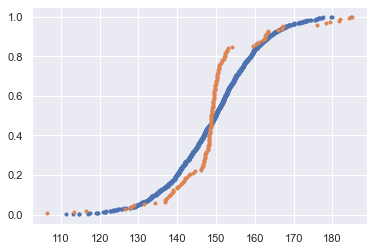

In [44]:
x_theo,y_theo= ecdf(data_norm_theo)
x_act,y_act=ecdf(timee)
plt.plot(x_theo,y_theo,'.',linestyle='none')
plt.plot(x_act,y_act,'.',linestyle='none')
plt.plot
plt.show()


# Exponential

the no of no_hitter games between 1901-2015

we assume that the data is poisson distribution so the interval(waiting time) between matches is

exponential distribution 

In [45]:
nohitter_times = np.array([843,1613,1101,215,684,814,278,324,161,219,545,715,966,624
,29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104
,123,251,93,188,983,166,96,702,23,524,26,299,59,39
,12,2,308,1114,813,887,645,2088,42,2090,11,886,1665,1084
,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127
,2147,211,41,1575,151,479,697,557,2267,542,392,73,603,233
,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717
,224,219,1531,498,44,288,267,600,52,269,1086,386,176,2199
,216,54,675,1243,463,650,171,327,110,774,509,8,197,136
,12,1124,64,380,811,232,192,731,715,226,605,539,1491,323
,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149
,576,445,180,1403,252,675,1351,2983,1568,45,899,3260,1025,31
,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660
,242,577,179,157,192,192,1848,792,1693,55,388,225,1134,1172
,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491
,580,2072,6450,578,745,1075,1103,1549,1520,138,1202,296,277,351
,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162
,1027,783,326,101,876,381,905,156,419,239,119,129,467])

In [46]:
tau=np.mean(nohitter_times)

In [47]:
np.random.seed(42)
data_exp=np.random.exponential(tau,1000)

<function matplotlib.pyplot.show(close=None, block=None)>

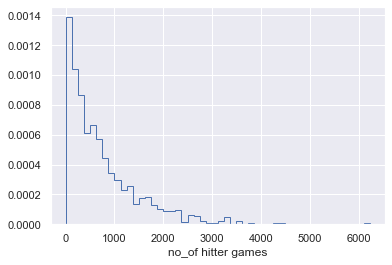

In [48]:
plt.hist(data_exp,density=True,bins=50,histtype='step')
plt.xlabel('no_of hitter games')
plt.show

how to make sure that original data is exponential???

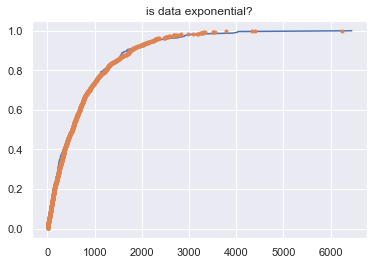

In [49]:
x,y=ecdf(nohitter_times)
x_theo,y_theo=ecdf(data_exp)
plt.plot(x,y)
plt.plot(x_theo,y_theo,marker='.',linestyle='none')
plt.title("is data exponential?")
plt.show()

Best choice of tau

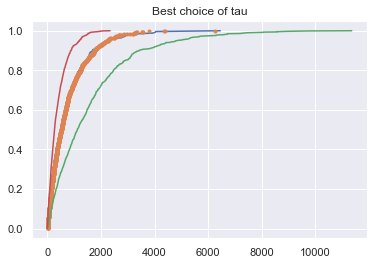

In [50]:
data_exp_2tau=np.random.exponential(2*tau,1000)
data_exp_half_tau=np.random.exponential(0.5*tau,1000)
x,y=ecdf(nohitter_times)
x_theo,y_theo=ecdf(data_exp)
x_theo2,y_theo2=ecdf(data_exp_2tau)
x_theo3,y_theo3=ecdf(data_exp_half_tau)

plt.plot(x,y)
plt.plot(x_theo,y_theo,marker='.',linestyle='none')
plt.plot(x_theo2,y_theo2)
plt.plot(x_theo3,y_theo3)
plt.title("Best choice of tau")
plt.show()

# Linear Regression

linear function has two main parameters 

1)Slope: 


2)Intersect with y axis

we need to choose optimal slope and intersect to our data  which make the line close to our data

where sum of square residuals is minimum (least squares)

# relation between literacy(المعرفه)  and fertility(عدد الاطفال)

In [51]:
illetracy=np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
                     6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [52]:
fertility=np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

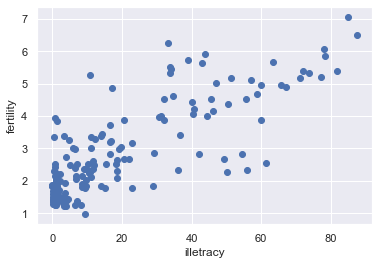

In [53]:
plt.scatter(illetracy,fertility)
plt.xlabel('illetracy')
plt.ylabel('fertility')
plt.show()

it seems we have positive correlation between both variables

In [54]:
corr=np.corrcoef(illetracy,fertility)[0,1]
print(corr)

0.8041324026815341


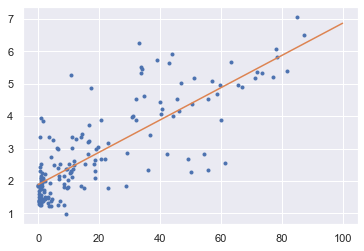

In [55]:
plt.plot(illetracy,fertility,'.',linestyle='none')
a,b=np.polyfit(illetracy,fertility,deg=1)
x=np.arange(0,101)
y=a*x+b
plt.plot(x,y)
plt.show()

# Optimization curve

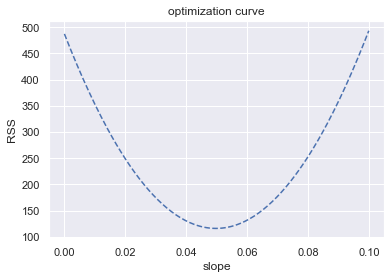

In [56]:
a_val=np.linspace(0,0.1,200) 
rss=np.empty_like(a_val)
for i,a in enumerate(a_val):
    rss[i]=np.sum((fertility-a*illetracy-b)**2)
    
plt.plot(a_val,rss,'--')
plt.xlabel('slope')
plt.ylabel('RSS')
plt.title('optimization curve')
plt.show()

we draw the values of rss opposite to each value of slope in range (0,0.1) searching fot the point

on curve where rss is minimum this is best value of slope

# Look before you leap

always we should explore the data first as we may have different data with same parameters for 

mean , median , fitting parameters but different models needed to fit these data to meaningful outcome

In [57]:
x=np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])

In [58]:
y=np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

In [59]:
a,b=np.polyfit(x,y,deg=1)

In [60]:
x_theo=np.array([3,15])
y_theo=a*x_theo+b

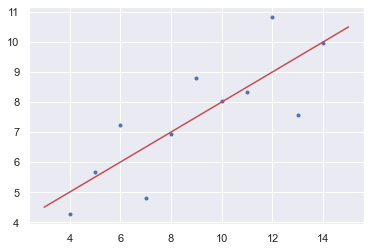

In [61]:
_=plt.plot(x,y,'.',linestyle='none')
_=plt.plot(x_theo,y_theo,'r')
plt.show()

# Bootstrap replicate

sampling methods are different so when we take samples from data over

and over we don't expect to have the same sample statistics so we need

to know the values of these statistics for the population not only the sample

we have so we need to resample(with replacment) data again and again to obtain statisitcs on new data

*Bootstrapping: resampling data more than time to do satistical inference 

*Bootstrap sample:each resampled array

*Bootstrap replicate: value of summary statistic of resampled array





In [62]:
rainfall=np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

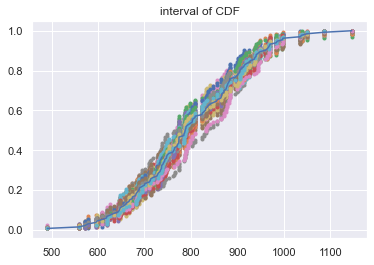

In [63]:
for i in range(50):
    resampled_data=np.random.choice(rainfall,size=len(rainfall))
    x,y=ecdf(resampled_data)
    plt.plot(x,y,'.')
    
    
x,y=ecdf(rainfall)
plt.plot(x,y)
plt.title('interval of CDF')
plt.show()

# generate bootstrap replicate

In [64]:
def bootstrap_replicate_1d(data,func):
    resampled_data=np.random.choice(data,size=len(data))
    return func(resampled_data)

In [65]:
bootstrap_replicate_1d(rainfall,np.mean)

803.5533834586466

# Apply it many times

In [66]:
def draw_bootstrap_replicates(data,func,size=1):
    temp=np.empty(size)
    for i in range(size):
        temp[i]=bootstrap_replicate_1d(data,func)
        
    return temp

if we take 10000 sample of n size for population following CLT therom:

1-take random samples(independent)

2-population is normally distributed 

3-if poulation has skewness then sample size must be >30


then we can say that each sample is normally distributed with mean (x bar) is the sample mean or point estimate 
we are concerned on the population parameter which is the pop mean so.... we take mean of each sample and draw the 
sampling distribution:

1-mean of sampling distibution = mean of population 

2-SE=std/sqrt(n) (how much the sample mean is far from the pop mean)


In [67]:
no_of_draws=draw_bootstrap_replicates(rainfall,np.mean,10000)

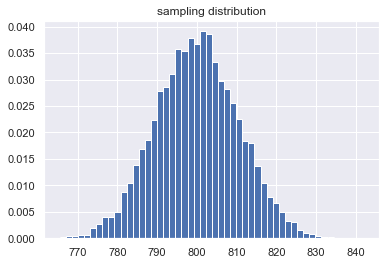

In [68]:
plt.hist(no_of_draws,bins=50,density=True)
plt.title('sampling distribution')
plt.show()

as we see we can conclude that the pop mean is approximatly equal 800

In [69]:
SE=np.std(rainfall)/np.sqrt(len(rainfall))
SE

10.510549150506188

In [70]:
np.std(no_of_draws)

10.457798833542263

SE is SD for the sampling distribution

Instead of definning the mean of sampling as a point which is not accurate enough we can define it as interval which 
we are confident that the true mean fall in this interval with ...% 

In [71]:
CI_95=np.percentile(no_of_draws,[2.5,97.5])
CI_95

array([779.57362782, 820.53915414])

we are 95% sure that the true mean of pop fall between 779.5 to 820.6

all the pervious we calculated CI for the data itself 

what if we want to calculate CI for the parameters of the model represent data like(a,b) for linear regression.

# Pair bootstrap

instead of sampling data itself we sample indicies

# linear_regression_boot_strapping

In [72]:
def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope_reps, bs_intercept_reps

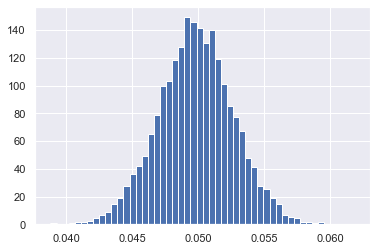

In [73]:
slop,inter=draw_bs_pairs_linreg(illetracy,fertility,10000)
plt.hist(slop,bins=50,density=True)
plt.show()

In [74]:
np.percentile(slop,[2.5,97.5])  ##95% CI

array([0.04417256, 0.05547333])

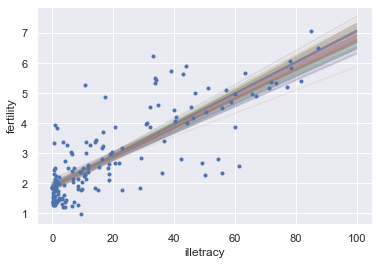

In [75]:
x=np.array([0,100])
for i in range(100):
    plt.plot(x,slop[i]*x+inter[i],alpha=0.2)
    
    
plt.plot(illetracy,fertility,'.',linestyle='none')
plt.xlabel('illetracy')
plt.ylabel('fertility')
plt.show()

# Hypothesis test

testing whether the provided data prove or neglect a certain hypothesis

null hypothesis: results due to chance there is no effect

alternative hypothesis: results nnot by chance

# To test that 2 distributions are  identical distribution

In [76]:
def permutation_sample(data1,data2):
    data_tot=np.concatenate((data1,data2))
    permuted_data=np.random.permutation(data_tot)
    sample_1=permuted_data[:len(data1)]
    sample_2=permuted_data[len(data1):]
    return sample_1,sample_2

In [125]:
def draw_perm_replicates(data1,data2,func,size=1):
    np.random.seed(42)
    perm_rep=np.empty(size)
    for i in range (size):
        sample_1,sample_2=permutation_sample(data1,data2)
        perm_rep[i]=func(sample_1,sample_2)
    return perm_rep

In [126]:
rain_june=np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

In [127]:
rain_november=np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

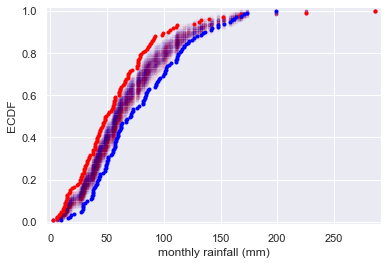

In [80]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

hypothesis test


1- define your null hypothesis 

2-define the test statistic 

3-generate many sets of simulated data assuming null hypothesis is true

4-compute test statstic for each set of data

5-p value is fraction at which the test static is at least equal oriignal observed value







The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis

In [81]:
force_a=np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

In [82]:
force_b=np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [128]:

def difference(data1,data2):
    df_mean=np.mean(data1)-np.mean(data2)
    return df_mean


simulated_mean=draw_perm_replicates(force_a, force_b, difference, size=10000) ######somthing wrong
real_mean=difference(force_a,force_b)
p_val=np.sum(simulated_mean>=real_mean)/len(simulated_mean)
print(p_val)  

0.0063


In [129]:
simulated_mean

array([ 0.00865,  0.00935,  0.01845, ..., -0.05835,  0.25855,  0.16225])

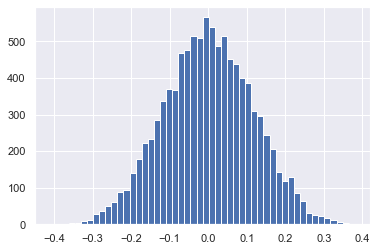

In [130]:
plt.hist(simulated_mean,bins=50)
plt.show()

# Translation..........

# A/B Test

A/B test is used by organizations to test if the specific strategy used is already 

effective or results obtained is due to chance



EX: new rule added in baseball game is assumed to increase average time between no-hitters 
so we will assume this as null hypothesis

In [131]:
##average time before rule 
nht_dead=np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [132]:
##average time after rule 
nht_live=np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [133]:
original_diff_in_mean=np.mean(nht_dead)-np.mean(nht_live)

In [134]:
difference_in_pems=draw_perm_replicates(nht_dead,nht_live,difference,size=10000)

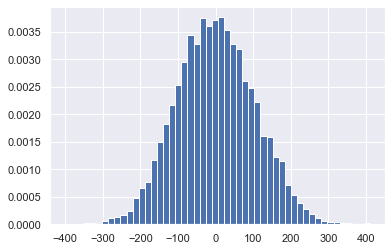

In [135]:
plt.hist(difference_in_pems,bins=50,density=True)
plt.show()

In [136]:
p_val=np.sum(difference_in_pems<=original_diff_in_mean)/len(difference_in_pems)
p_val

0.0001

as p_value is so small we can reject null hypothesis stating that there's difference in times 
after changing rule

# Correlation

In [137]:
true_corr= np.corrcoef(illetracy,fertility)[1,0]

In [145]:
perm_rep=np.empty(10000)
for i in range(10000):
    perm_fert=np.random.permutation(fertility)
    perm_rep[i]=np.corrcoef(illetracy,perm_fert)[1,0]
    
p_val=np.sum(perm_rep>=true_corr)/len(perm_rep)
p_val
    


0.0

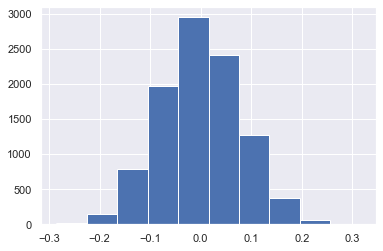

In [146]:
plt.hist(perm_rep)
plt.show()

In [144]:
true_corr

0.8041324026815341

so they are totally correlated(reject null hypothesis)

# Come up togther

# Finch beak length and depth

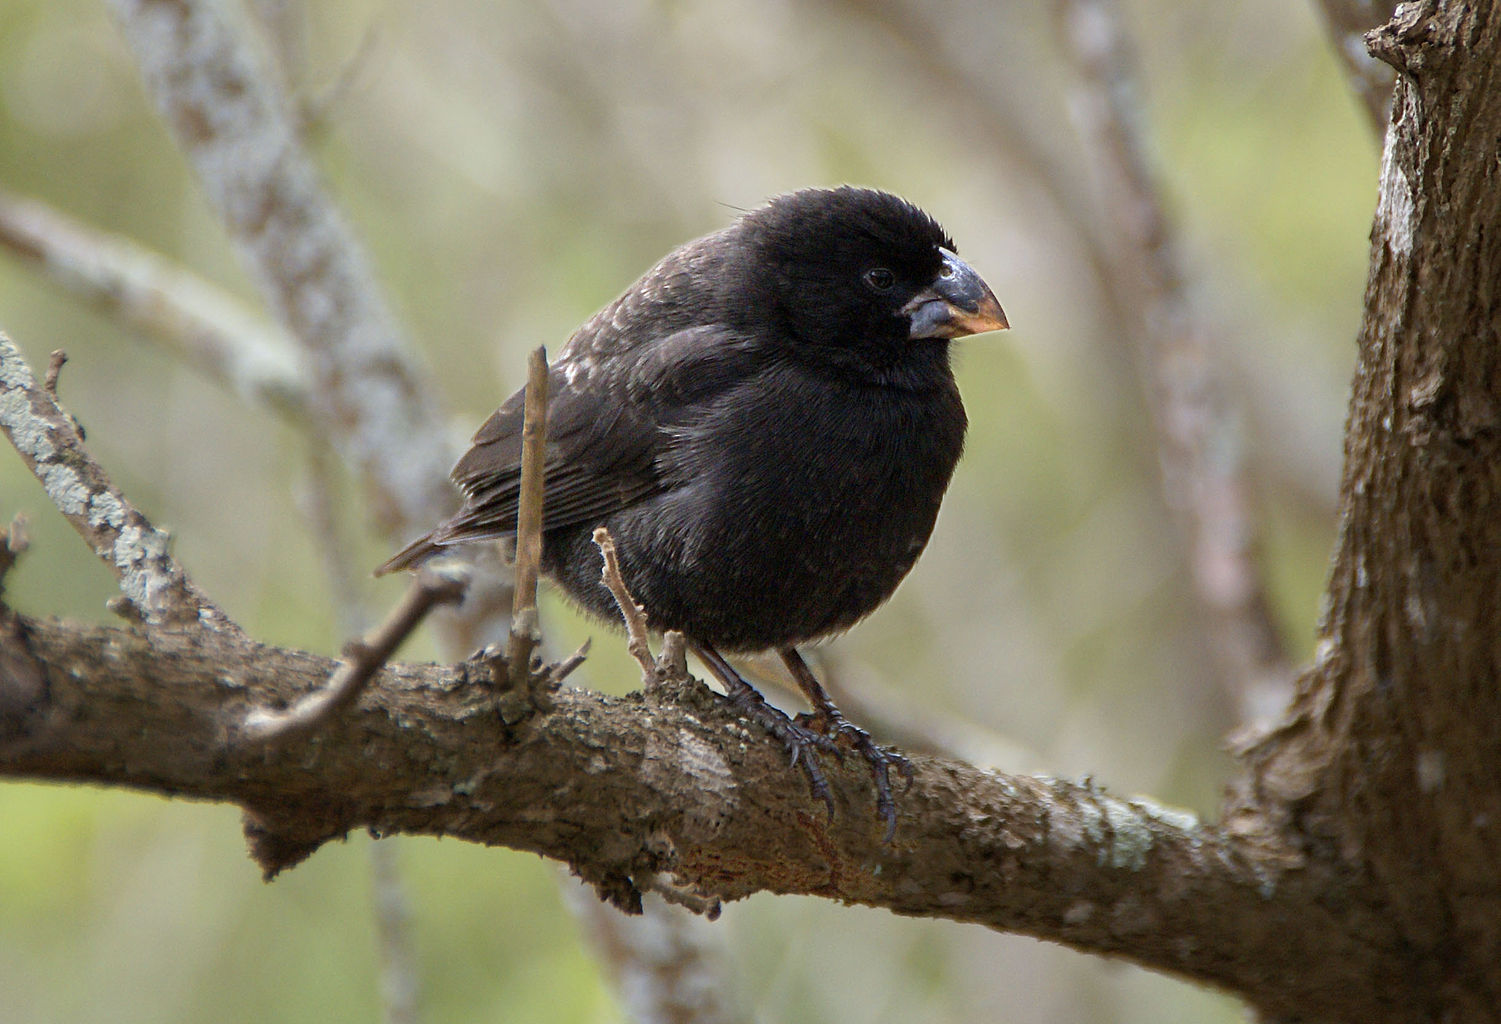

In [149]:
import os
RAWURL = 'https://raw.githubusercontent.com/jfogarty/machine-learning-intro-workshop/master/data/'
TMPDIR = './tmpData'
if not os.path.exists(TMPDIR) : os.makedirs(TMPDIR)
files = ['finch_beaks_1975.csv', 'finch_beaks_2012.csv', 'fortis_beak_depth_heredity.csv', 'scandens_beak_depth_heredity.csv']
for f in files:
    FROMURL = os.path.join(RAWURL, f)
    TOPATH = os.path.join(TMPDIR, f)
    !curl $FROMURL -o $TOPATH

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8256  100  8256    0     0   9013      0 --:--:-- --:--:-- --:--:--  9003
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5608  100  5608    0     0  13778      0 --:--:-- --:--:-- --:--:-- 13778
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:

In [182]:
data_1975 = pd.read_csv(os.path.join(TMPDIR, 'finch_beaks_1975.csv'))
data_2012 = pd.read_csv(os.path.join(TMPDIR, 'finch_beaks_2012.csv'))

In [189]:
data_1975=data_1975.rename(columns={'band':'band','species':'species','Beak length, mm':'blength','Beak depth, mm':'bdepth'})

In [190]:

data_total=pd.concat([data_1975,data_2012],keys=['1975','2012'],names=['year',])
data_total.reset_index(inplace=True)


In [191]:
data_total.head()

,year,level_1,band,species,blength,bdepth
0,1975,0,2,fortis,9.4,8.0
1,1975,1,9,fortis,9.2,8.3
2,1975,2,12,fortis,9.5,7.5
3,1975,3,15,fortis,9.5,8.0
4,1975,4,305,fortis,11.5,9.9


# 1-Swarm plot

Text(0.5, 1.0, 'Beak depth difference between 1975  2012')

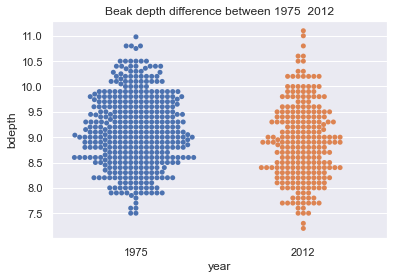

In [194]:
sns.swarmplot(x='year',y='bdepth',data=data_total)
plt.title('Beak depth difference between 1975  2012')

# 2-ECDF

In [262]:
depth_1975=data_total[(data_total['year']=='1975')&(data_total['species'] == 'scandens')]['bdepth'].reset_index(drop=True)
depth_2012=data_total[(data_total['year']=='2012') &(data_total['species'] == 'scandens')]['bdepth'].reset_index(drop=True)

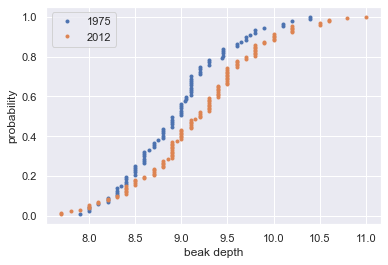

In [218]:
x_1975,y_1975=ecdf(depth_1975)
x_2012,y_2012=ecdf(depth_2012)
plt.plot(x_1975,y_1975,'.',linestyle='none')
plt.plot(x_2012,y_2012,'.',linestyle='none')
plt.xlabel('beak depth')
plt.ylabel('probability')
plt.legend(['1975','2012'])
plt.show()

# 3-CI

as we know we are interested in the mean beak depth of all the population not only the

sample we have so we cannot obtain it unless we do sampling distribution where the mean equal the mean of pop 

we are interested here to difference of mean depth between 1975 and 2012 (test statitstic)

In [219]:
diff_in_sample= np.mean(depth_2012)-np.mean(depth_1975) ##difference in our sample

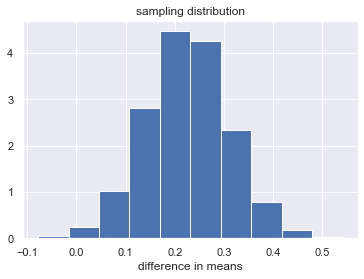

In [220]:
###construct sampling distribution
boot_strap_depth2012=draw_bootstrap_replicates(depth_2012,np.mean,size=10000)
boot_strap_depth1975=draw_bootstrap_replicates(depth_1975,np.mean,size=10000)
sampling_dis=boot_strap_depth2012-boot_strap_depth1975
plt.hist(sampling_dis,density=True)
plt.xlabel('difference in means')
plt.title('sampling distribution')
plt.show()

In [221]:
ci=np.percentile(sampling_dis,[2.5,97.5])
ci

array([0.05730557, 0.39213148])

In [222]:
diff_in_sample

0.2262204724409429

we are confident by 95% the true difference in depth between 0.106  and  0.337 (the beak got deeper)

# is these conclusion might be by chance??

to answer this question we have to run a hupothesis test 

null hypothesis: the difference in beak depth between 1975 and 2012 is due to chance(mean_1975=mean_2012_

alternative: the differnce is real not by chance

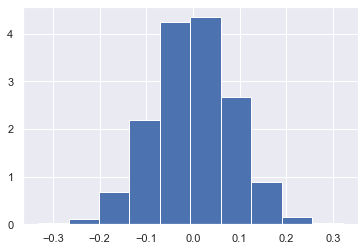

In [230]:
###shift data to make it the same mean to test null hypothesis 

combined_data_mean=np.mean(np.concatenate((depth_1975,depth_2012)))
                           
shifted_1975=depth_1975-np.mean(depth_1975)+combined_data_mean
shifted_2012=depth_2012-np.mean(depth_2012)+combined_data_mean
                           
boot_strap_shifted2012=draw_bootstrap_replicates(shifted_2012,np.mean,size=10000)
boot_strap_shifted1975=draw_bootstrap_replicates(shifted_1975,np.mean,size=10000)   

difference_shifted_means=boot_strap_shifted2012-boot_strap_shifted1975

plt.hist(difference_shifted_means,density=True)
plt.show()

In [231]:
p_val=np.sum(difference_shifted_means>=diff_in_sample)/len(difference_shifted_means)

In [233]:
p_val

0.0044

small p-value indicates that the difference is real in depth(reject null hypothesis)

# Does the shape remains the same?

if the beak length changes with the peak depth this makes the whole shape is fixed

so we want to invistigate relation between depth and length

In [263]:
length_1975=data_total[(data_total['year']=='1975')&(data_total['species'] == 'scandens')]['blength'].reset_index(drop=True)
length_2012=data_total[(data_total['year']=='2012') &(data_total['species'] == 'scandens')]['blength'].reset_index(drop=True)

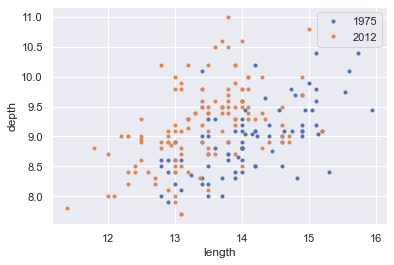

In [264]:
plt.plot(length_1975,depth_1975,'.',linestyle='none')
plt.plot(length_2012,depth_2012,'.',linestyle='none')
plt.xlabel('length')
plt.ylabel('depth')
plt.legend(['1975','2012'])

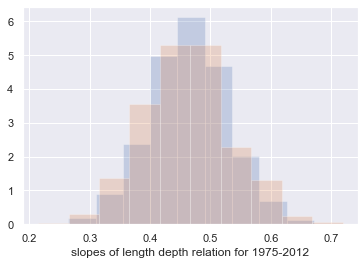

In [266]:
sample_a_b_1975=np.polyfit(length_1975,depth_1975,deg=1)
sample_a_b_2012=np.polyfit(length_2012,depth_2012,deg=1)
a_bs_1975,b_bs_1975=draw_bs_pairs_linreg(length_1975,depth_1975, size=1000)
a_bs_2012,b_bs_2012=draw_bs_pairs_linreg(length_2012,depth_2012, size=1000)

plt.hist(a_bs_1975,density=True,alpha=0.25)
plt.hist(a_bs_2012,density=True,alpha=0.25)
plt.xlabel('slopes of length depth relation for 1975-2012')
plt.show()



In [267]:
np.percentile(a_bs_1975,[2.5,97.5])

array([0.33443768, 0.59071276])

In [268]:
np.percentile(a_bs_2012,[2.5,97.5])

array([0.32779154, 0.61052668])

length and the depth of  1975 , 2012 approximatly have same range of slopes

In [276]:
np.percentile(b_bs_1975,[2.5,97.5])

array([0.65111812, 4.20291847])

In [277]:
np.percentile(b_bs_2012,[2.5,97.5])

array([1.04388025, 4.78042994])

range of intercept not the same

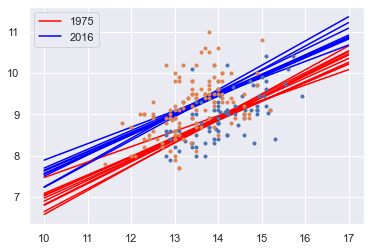

In [275]:
x=np.array([10,17])
for i in range(10):
    plt.plot(x,a_bs_1975[i]*x+b_bs_1975[i],color='red')
    plt.plot(x,a_bs_2012[i]*x+b_bs_2012[i],color='blue')
    
plt.plot(length_1975,depth_1975,'.',linestyle='none')
plt.plot(length_2012,depth_2012,'.',linestyle='none')
plt.legend(['1975','2016'])

# change in shape

In [281]:
ratio_l_d_1975=length_1975/depth_1975
ratio_l_d_2012=length_2012/depth_2012
mean_ratio_1975=np.mean(ratio_l_d_1975)
mean_ratio_2012=np.mean(ratio_l_d_2012)

rep_ratio_1975=draw_bootstrap_replicates(ratio_l_d_1975,np.mean,size=10000)
rep_ratio_2012=draw_bootstrap_replicates(ratio_l_d_2012,np.mean,size=10000)
ci_1975_ratio=np.percentile(rep_ratio_1975,[0.5,99.5])
ci_2012_ratio=np.percentile(rep_ratio_2012,[0.5,99.5])

In [282]:
mean_ratio_1975,ci_1975_ratio

(1.5788823771858533, array([1.55657014, 1.60126769]))

In [284]:
mean_ratio_2012,ci_2012_ratio

(1.4658342276847778, array([1.44407251, 1.48785822]))

by 99% CI the shape decreased by 0.1

# what is the cause of shape?

is the change in the shape is inhertied from parents for each species?

In [285]:
bd_parent_scandens=np.array([ 8.3318,  8.4035,  8.5317,  8.7202,  8.7089,  8.7541,  8.773 ,
        8.8107,  8.7919,  8.8069,  8.6523,  8.6146,  8.6938,  8.7127,
        8.7466,  8.7504,  8.7805,  8.7428,  8.7164,  8.8032,  8.8258,
        8.856 ,  8.9012,  8.9125,  8.8635,  8.8258,  8.8522,  8.8974,
        8.9427,  8.9879,  8.9615,  8.9238,  8.9351,  9.0143,  9.0558,
        9.0596,  8.9917,  8.905 ,  8.9314,  8.9465,  8.9879,  8.9804,
        9.0219,  9.052 ,  9.0407,  9.0407,  8.9955,  8.9992,  8.9992,
        9.0747,  9.0747,  9.5385,  9.4781,  9.4517,  9.3537,  9.2707,
        9.1199,  9.1689,  9.1425,  9.135 ,  9.1011,  9.1727,  9.2217,
        9.2255,  9.2821,  9.3235,  9.3198,  9.3198,  9.3198,  9.3273,
        9.3725,  9.3989,  9.4253,  9.4593,  9.4442,  9.4291,  9.2632,
        9.2293,  9.1878,  9.1425,  9.1275,  9.1802,  9.1765,  9.2481,
        9.2481,  9.1991,  9.1689,  9.1765,  9.2406,  9.3198,  9.3235,
        9.1991,  9.2971,  9.2443,  9.316 ,  9.2934,  9.3914,  9.3989,
        9.5121,  9.6176,  9.5535,  9.4668,  9.3725,  9.3348,  9.3763,
        9.3839,  9.4216,  9.4065,  9.3348,  9.4442,  9.4367,  9.5083,
        9.448 ,  9.4781,  9.595 ,  9.6101,  9.5686,  9.6365,  9.7119,
        9.8213,  9.825 ,  9.7609,  9.6516,  9.5988,  9.546 ,  9.6516,
        9.7572,  9.8854, 10.0023,  9.3914]) ##parent average depth

In [286]:
bd_offspring_scandens=np.array([ 8.419 ,  9.2468,  8.1532,  8.0089,  8.2215,  8.3734,  8.5025,
        8.6392,  8.7684,  8.8139,  8.7911,  8.9051,  8.9203,  8.8747,
        8.943 ,  9.0038,  8.981 ,  9.0949,  9.2696,  9.1633,  9.1785,
        9.1937,  9.2772,  9.0722,  8.9658,  8.9658,  8.5025,  8.4949,
        8.4949,  8.5633,  8.6013,  8.6468,  8.1532,  8.3734,  8.662 ,
        8.6924,  8.7456,  8.8367,  8.8595,  8.9658,  8.9582,  8.8671,
        8.8671,  8.943 ,  9.0646,  9.1405,  9.2089,  9.2848,  9.3759,
        9.4899,  9.4519,  8.1228,  8.2595,  8.3127,  8.4949,  8.6013,
        8.4646,  8.5329,  8.7532,  8.8823,  9.0342,  8.6392,  8.6772,
        8.6316,  8.7532,  8.8291,  8.8975,  8.9734,  9.0494,  9.1253,
        9.1253,  9.1253,  9.1785,  9.2848,  9.4595,  9.3608,  9.2089,
        9.2544,  9.3684,  9.3684,  9.2316,  9.1709,  9.2316,  9.0342,
        8.8899,  8.8291,  8.981 ,  8.8975, 10.4089, 10.1886,  9.7633,
        9.7329,  9.6114,  9.5051,  9.5127,  9.3684,  9.6266,  9.5354,
       10.0215, 10.0215,  9.6266,  9.6038,  9.4063,  9.2316,  9.338 ,
        9.262 ,  9.262 ,  9.4063,  9.4367,  9.0342,  8.943 ,  8.9203,
        8.7835,  8.7835,  9.057 ,  8.9354,  8.8975,  8.8139,  8.8671,
        9.0873,  9.2848,  9.2392,  9.2924,  9.4063,  9.3152,  9.4899,
        9.5962,  9.6873,  9.5203,  9.6646]) ##descents average depth

In [287]:
bd_parent_fortis=np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  ,
        9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  ,
       10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  ,
        8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 ,
        9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  ,
       10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  ,
        9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 ,
        9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 ,
       10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 ,
       10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625,
        9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 ,
        9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 ,
        9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 ,
        9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   ,
        9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  ,
        9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  ,
        9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 ,
        9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 ,
       10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775,
        9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025,
        8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
       10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  ,
        9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  ,
        8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 ,
        8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  ,
        9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 ,
       10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775,
        9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 ,
        9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 ,
       10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  ,
        8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 ,
        8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   ,
        9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 ,
        9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 ,
        8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 ,
        9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825,
        9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375,
        8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 ,
        9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 ,
        9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  ,
        9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 ,
        9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725,
        8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])

In [288]:
bd_offspring_fortis=np.array([10.7 ,  9.78,  9.48,  9.6 , 10.27,  9.5 ,  9.  ,  7.46,  7.65,
        8.63,  9.81,  9.4 ,  9.48,  8.75,  7.6 , 10.  , 10.09,  9.74,
        9.64,  8.49, 10.15, 10.28,  9.2 , 10.01,  9.03,  9.94, 10.5 ,
        9.7 , 10.02, 10.04,  9.43,  8.1 ,  9.5 ,  9.9 ,  9.48, 10.18,
       10.16,  9.08, 10.39,  9.9 ,  8.4 , 10.6 ,  8.75,  9.46,  9.6 ,
        9.6 ,  9.95, 10.05, 10.16, 10.1 ,  9.83,  9.46,  9.7 ,  9.82,
       10.34,  8.02,  9.65,  9.87,  9.  , 11.14,  9.25,  8.14, 10.23,
        8.7 ,  9.8 , 10.54, 11.19,  9.85,  8.1 ,  9.3 ,  9.34,  9.19,
        9.52,  9.36,  8.8 ,  8.6 ,  8.  ,  8.5 ,  8.3 , 10.38,  8.54,
        8.94, 10.  ,  9.76,  9.45,  9.89, 10.9 ,  9.91,  9.39,  9.86,
        9.74,  9.9 ,  9.09,  9.69, 10.24,  8.9 ,  9.67,  8.93,  9.3 ,
        8.67,  9.15,  9.23,  9.59,  9.03,  9.58,  8.97,  8.57,  8.47,
        8.71,  9.21,  9.13,  8.5 ,  9.58,  9.21,  9.6 ,  9.32,  8.7 ,
       10.46,  9.29,  9.24,  9.45,  9.35, 10.19,  9.91,  9.18,  9.89,
        9.6 , 10.3 ,  9.45,  8.79,  9.2 ,  8.8 ,  9.69, 10.61,  9.6 ,
        9.9 ,  9.26, 10.2 ,  8.79,  9.28,  8.83,  9.76, 10.2 ,  9.43,
        9.4 ,  9.9 ,  9.5 ,  8.95,  9.98,  9.72,  9.86, 11.1 ,  9.14,
       10.49,  9.75, 10.35,  9.73,  9.83,  8.69,  9.58,  8.42,  9.25,
       10.12,  9.31,  9.99,  8.59,  8.74,  8.79,  9.6 ,  9.52,  8.93,
       10.23,  9.35,  9.35,  9.09,  9.04,  9.75, 10.5 ,  9.09,  9.05,
        9.54,  9.3 ,  9.06,  8.7 ,  9.32,  8.4 ,  8.67,  8.6 ,  9.53,
        9.77,  9.65,  9.43,  8.35,  8.26,  9.5 ,  8.6 ,  9.57,  9.14,
       10.79,  8.91,  9.93, 10.7 ,  9.3 ,  9.93,  9.51,  9.44, 10.05,
       10.13,  9.24,  8.21,  8.9 ,  9.34,  8.77,  9.4 ,  8.82,  8.83,
        8.6 ,  9.5 , 10.2 ,  8.09,  9.07,  9.29,  9.1 , 10.19,  9.25,
        8.98,  9.02,  8.6 ,  8.25,  8.7 ,  9.9 ,  9.65,  9.45,  9.38,
       10.4 ,  9.96,  9.46,  8.26, 10.05,  8.92,  9.5 ,  9.43,  8.97,
        8.44,  8.92, 10.3 ,  8.4 ,  9.37,  9.91, 10.  ,  9.21,  9.95,
        8.84,  9.82,  9.5 , 10.29,  8.4 ,  8.31,  9.29,  8.86,  9.4 ,
        9.62,  8.62,  8.3 ,  9.8 ,  8.48,  9.61,  9.5 ,  9.37,  8.74,
        9.31,  9.5 ,  9.49,  9.74,  9.2 ,  9.24,  9.7 ,  9.64,  9.2 ,
        7.5 ,  7.5 ,  8.7 ,  8.31,  9.  ,  9.74,  9.31, 10.5 ,  9.3 ,
        8.12,  9.34,  9.72,  9.  ,  9.65,  9.9 , 10.  , 10.1 ,  8.  ,
        9.07,  9.75,  9.33,  8.11,  9.36,  9.74,  9.9 ,  9.23,  9.7 ,
        8.2 ,  9.35,  9.49,  9.34,  8.87,  9.03,  9.07,  9.43,  8.2 ,
        9.19,  9.  ,  9.2 ,  9.06,  9.81,  8.89,  9.4 , 10.45,  9.64,
        9.03,  8.71,  9.91,  8.33,  8.2 ,  7.83,  7.14,  8.91,  9.18,
        8.8 ,  9.9 ,  7.73,  9.25,  8.7 ,  9.5 ,  9.3 ,  9.05, 10.18,
        8.85,  9.24,  9.15,  9.98,  8.77,  9.8 ,  8.65, 10.  ,  8.81,
        8.01,  7.9 ,  9.41, 10.18,  9.55,  9.08,  8.4 ,  9.75,  8.9 ,
        9.07,  9.35,  8.9 ,  8.19,  8.65,  9.19,  8.9 ,  9.28, 10.58,
        9.  ,  9.4 ,  8.91,  9.93, 10.  ,  9.37,  7.4 ,  9.  ,  8.8 ,
        9.18,  8.3 , 10.08,  7.9 ,  9.96, 10.4 ,  9.65,  8.8 ,  8.65,
        9.7 ,  9.23,  9.43,  9.93,  8.47,  9.55,  9.28,  8.85,  8.9 ,
        8.75,  8.63,  9.  ,  9.43,  8.28,  9.23, 10.4 ,  9.  ,  9.8 ,
        9.77,  8.97,  8.37,  7.7 ,  7.9 ,  9.5 ,  8.2 ,  8.8 ])


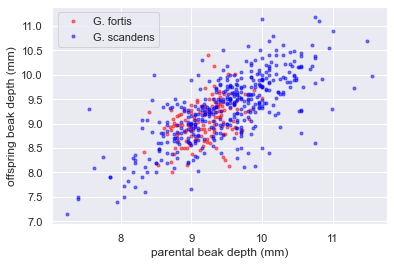

In [289]:

_ = plt.plot(bd_parent_scandens,bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)
_ = plt.plot(bd_parent_fortis,bd_offspring_fortis ,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

_ = plt.legend(('G. fortis', 'G. scandens'))
plt.show()


# Correlation

In [293]:
def pearson_corr(x,y):
    corr=np.corrcoef(x,y)
    return corr[1,0]

In [295]:
corr_in_sample_scandens= pearson_corr(bd_parent_scandens,bd_offspring_scandens)
corr_in_sample_fortis= pearson_corr(bd_parent_fortis,bd_offspring_fortis)

In [296]:
def draw_bs_pairs(x, y, func, size=1):
    inds = np.arange(len(x))
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds,len(inds))
        bs_x, bs_y = x[bs_inds],y[bs_inds]
        bs_replicates[i] = func(bs_x,bs_y)

    return bs_replicates

In [297]:
scandens_corr=draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,pearson_corr,1000)
fortis_corr=draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,pearson_corr,1000)

In [299]:
conf_int_scandens = np.percentile(scandens_corr,[2.5,97.5])
conf_int_fortis = np.percentile(fortis_corr,[2.5,97.5])

In [300]:
corr_in_sample_scandens,conf_int_scandens

(0.41170636294012575, array([0.27168476, 0.5497082 ]))

In [301]:
corr_in_sample_fortis,conf_int_fortis

(0.7283412395518486, array([0.67483656, 0.77907196]))

fortis group is more correlated to thier parents than scadens

# Hertability

it's better to define hertability as the covariance between parent and descent to the variance in parent alone

In [304]:
def heritability(parent,son):
    return np.cov(parent,son)[0,1]/np.cov(parent,son)[0,0]

In [305]:

heritability_scandens = heritability(bd_parent_scandens,bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,bd_offspring_fortis)

replicates_scandens = draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,heritability,size=1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,heritability,size=100)

conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile( replicates_fortis ,[2.5,97.5])

In [306]:
heritability_scandens,conf_int_scandens

(0.5485340868685982, array([0.33102612, 0.75896878]))

In [307]:
heritability_fortis,conf_int_fortis

(0.7229051911438155, array([0.64727764, 0.79134076]))

In [308]:

perm_replicates = np.empty(10000)

for i in range(10000):
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0
